<a href="https://colab.research.google.com/github/s11000/pandas-data-frame/blob/main/yolov3/4_Create_a_Running_Environment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

My blog post：https://jason-chen-1992.weebly.com/home/-google-colab-yolov4

# Step 1 : Download the darknet repository

In [1]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15851, done.
remote: Counting objects: 100% (18/18), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 15851 (delta 5), reused 12 (delta 4), pack-reused 15833
Receiving objects: 100% (15851/15851), 14.38 MiB | 13.29 MiB/s, done.
Resolving deltas: 100% (10675/10675), done.


# Step 2 : Modify the Makefile to have GPU and OpenCV enabled

In [2]:
%cd darknet
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/darknet


# Step 3 : Make darknet

In [3]:
!make

mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:945:23: warning: variable ‘rgb’ set but not used []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-but-set-variable-Wunused-but-set-variable]8;;]
  945 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1443:14: wa

# Step 4: Download pretrained YOLOv3 and YOLOv4 weights
YOLOv3 and YOLOv4 has been trained already on the coco dataset which has 80 classes that it can predict. We will grab these pretrained weights so that we can run YOLOv3 and YOLOv4 on these pretrained classes and get detections.

In [4]:
download_from_official = False

if download_from_official:
  # download weights form official
  !wget https://pjreddie.com/media/files/yolov3.weights
  !wget https://pjreddie.com/media/files/darknet53.conv.74
  !wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.weights
  !wget https://github.com/AlexeyAB/darknet/releases/download/darknet_yolo_v3_optimal/yolov4.conv.137
else:
  # download weights form Jason Chen's google drive (should be faster)
  !gdown https://drive.google.com/uc?id=1hSaT4Yc19atZZulW3Q3BUDFIohfGteXN
  !gdown https://drive.google.com/uc?id=1XpMMC_eUfHKaIpfmxZa71IyocMW6ssCb
  !gdown https://drive.google.com/uc?id=1vOlvou7Pgv36l-ahej5IIfYdb_9nmy0A
  !gdown https://drive.google.com/uc?id=1Zl3rh0ZOPVj4DPZdae8WqqZU0NLX7Ncp

Downloading...
From (original): https://drive.google.com/uc?id=1hSaT4Yc19atZZulW3Q3BUDFIohfGteXN
From (redirected): https://drive.google.com/uc?id=1hSaT4Yc19atZZulW3Q3BUDFIohfGteXN&confirm=t&uuid=c9db6102-8af0-4075-9694-d799a95d2711
To: /content/darknet/yolov3.weights
100% 248M/248M [00:05<00:00, 44.6MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1XpMMC_eUfHKaIpfmxZa71IyocMW6ssCb
From (redirected): https://drive.google.com/uc?id=1XpMMC_eUfHKaIpfmxZa71IyocMW6ssCb&confirm=t&uuid=8b1bec81-e5aa-49eb-9791-0f526af3213c
To: /content/darknet/darknet53.conv.74
100% 162M/162M [00:03<00:00, 51.2MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1vOlvou7Pgv36l-ahej5IIfYdb_9nmy0A
From (redirected): https://drive.google.com/uc?id=1vOlvou7Pgv36l-ahej5IIfYdb_9nmy0A&confirm=t&uuid=60f0051f-7e55-4adc-9834-dfa807af01e0
To: /content/darknet/yolov4.weights
100% 258M/258M [00:03<00:00, 65.6MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1Zl3rh0ZOP

# Step 5 : Run Object Detection with Darknet and YOLOv3/v4

### Define the show image function

In [5]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

### >>> 5-1. Run detection with YOLOv3

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 compute_capability = 610, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x 1

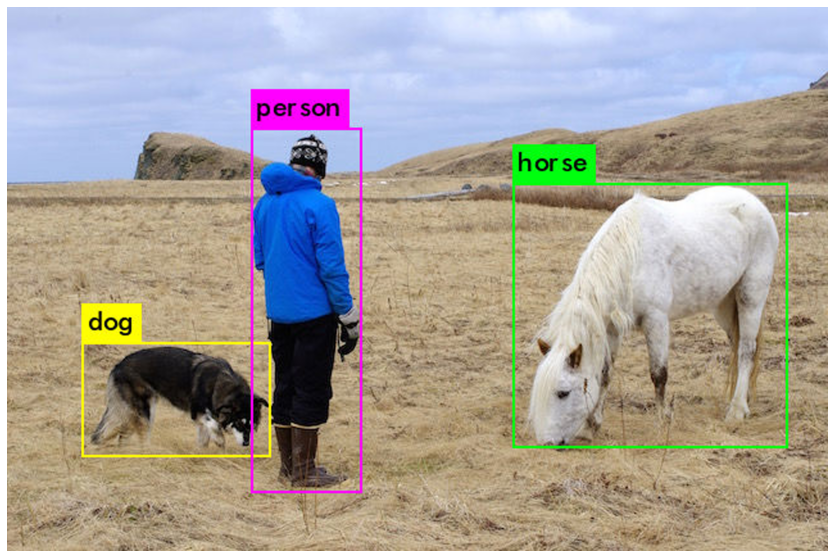

In [ ]:
# run darknet detection
!./darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg

# show result
imShow('predictions.jpg')

### >>> 5-2. Run detection with YOLOv4

 CUDA-version: 10010 (10010), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 compute_capability = 610, cudnn_half = 0 
net.optimized_memory = 0 
mini_batch = 1, batch = 8, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    608 x 608 x   3 ->  608 x 608 x  32 0.639 BF
   1 conv     64       3 x 3/ 2    608 x 608 x  32 ->  304 x 304 x  64 3.407 BF
   2 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   3 route  1 		                           ->  304 x 304 x  64 
   4 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF
   5 conv     32       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  32 0.379 BF
   6 conv     64       3 x 3/ 1    304 x 304 x  32 ->  304 x 304 x  64 3.407 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 304 x 304 x  64 0.006 BF
   8 conv     64       1 x 1/ 1    304 x 304 x  64 ->  304 x 304 x  64 0.757 BF

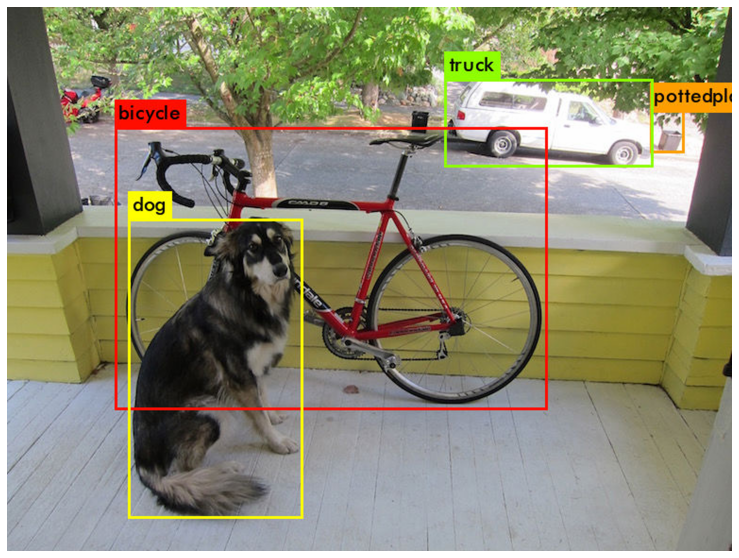

In [ ]:
# run darknet detection
!./darknet detect cfg/yolov4.cfg yolov4.weights data/dog.jpg

# show result
imShow('predictions.jpg')

# Step 6 : Copy the completed darknet to Google Drive

### >>> 6-1. Mount to Google Drive

In [6]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)

!ln -s /content/gdrive/My\ Drive/space_for_YOLO/ /mydrive

MessageError: Error: credential propagation was unsuccessful

### >>> 6-2. Zip the whole darknet folder before copy it

In [7]:
%cd ..
!zip -r darknet.zip darknet

/content
  adding: darknet/ (stored 0%)
  adding: darknet/data/ (stored 0%)
  adding: darknet/data/voc.names (deflated 30%)
  adding: darknet/data/person.jpg (deflated 3%)
  adding: darknet/data/goal.txt (deflated 43%)
  adding: darknet/data/coco.names (deflated 41%)
  adding: darknet/data/scream.jpg (deflated 1%)
  adding: darknet/data/openimages.names (deflated 46%)
  adding: darknet/data/eagle.jpg (deflated 2%)
  adding: darknet/data/coco9k.map (deflated 51%)
  adding: darknet/data/giraffe.jpg (deflated 0%)
  adding: darknet/data/horses.jpg (deflated 3%)
  adding: darknet/data/imagenet.shortnames.list (deflated 54%)
  adding: darknet/data/labels/ (stored 0%)
  adding: darknet/data/labels/48_5.png (deflated 2%)
  adding: darknet/data/labels/85_3.png (deflated 8%)
  adding: darknet/data/labels/80_2.png (deflated 13%)
  adding: darknet/data/labels/74_7.png (deflated 8%)
  adding: darknet/data/labels/119_1.png (deflated 10%)
  adding: darknet/data/labels/106_7.png (deflated 13%)
  addin

### >>> 6-3. Copy to Google Drive

In [9]:
!cp darknet.zip /mydrive/darknet.zip

cp: cannot create regular file '/mydrive/darknet.zip': No such file or directory


# Done! Complete creating the run environment.